In [94]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5
from astropy.time import Time
#import gal_altaz
import ugradio
%matplotlib notebook

# Determining Galactic Coordinates

In [2]:
def galtora(l, b):
    _ten = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
    _teneq = _ten.fk5
    _teneq.transform_to(FK5(equinox='J2019'))
    _tenra = _teneq.ra.degree
    _tendec = _teneq.dec.degree
    return _tenra, _tendec

In [3]:
l = np.empty([21, 66])
b = np.empty([21, 66])

In [4]:
l[0][1]

6.92247704369066e-310

In [5]:
lon = np.arange(-10, 254, 4)
lat = np.arange(-20, 21, 2)

In [6]:
len(lon)*len(lat)

1386

In [7]:
for i in range(len(l)):
    for j in range(len(l[i])):
        l[i][j] = lon[j]

In [8]:
l

array([[-10.,  -6.,  -2., ..., 242., 246., 250.],
       [-10.,  -6.,  -2., ..., 242., 246., 250.],
       [-10.,  -6.,  -2., ..., 242., 246., 250.],
       ...,
       [-10.,  -6.,  -2., ..., 242., 246., 250.],
       [-10.,  -6.,  -2., ..., 242., 246., 250.],
       [-10.,  -6.,  -2., ..., 242., 246., 250.]])

In [9]:
for i in range(len(b)):
    for j in range(len(b[i])):
        b[i][j] = lat[i]

In [10]:
b

array([[-20., -20., -20., ..., -20., -20., -20.],
       [-18., -18., -18., ..., -18., -18., -18.],
       [-16., -16., -16., ..., -16., -16., -16.],
       ...,
       [ 16.,  16.,  16., ...,  16.,  16.,  16.],
       [ 18.,  18.,  18., ...,  18.,  18.,  18.],
       [ 20.,  20.,  20., ...,  20.,  20.,  20.]])

# Determining RA and Dec

In [11]:
ra = np.empty([21, 66])
dec = np.empty([21, 66])

In [12]:
for i in range(len(b)):
    for j in range(len(b[i])):
        ra[i][j] = galtora(l[i][j], b[i][j])[0]
        dec[i][j] = galtora(l[i][j], b[i][j])[1]

In [13]:
ra

array([[283.90371967, 285.61136653, 287.24203645, ...,  96.17799727,
         97.73663565,  99.3397455 ],
       [281.18458295, 283.05363761, 284.82094361, ...,  98.43461114,
        100.10124617, 101.83101944],
       [278.53364047, 280.55247832, 282.44732425, ..., 100.6540112 ,
        102.42197741, 104.27022456],
       ...,
       [245.16421487, 248.00544481, 250.65842465, ..., 131.46934973,
        133.88287834, 136.45518284],
       [243.53655283, 246.35459868, 248.98995572, ..., 133.15773255,
        135.55824079, 138.11480051],
       [241.94638819, 244.7356971 , 247.34811102, ..., 134.8267294 ,
        137.20935621, 139.74498734]])

In [14]:
dec

array([[-46.51829028, -42.96043836, -39.40752408, ..., -34.21349569,
        -37.75444845, -41.3041437 ],
       [-45.84302512, -42.28351992, -38.72434696, ..., -33.51415746,
        -37.06697572, -40.62483668],
       [-45.10485909, -41.55100991, -37.99220882, ..., -32.77457505,
        -36.33343124, -39.89310495],
       ...,
       [-27.19545441, -24.32514116, -21.35724901, ..., -16.85573021,
        -19.94457606, -22.95356422],
       [-25.82478028, -23.01588137, -20.10616559, ..., -15.68387696,
        -18.71946044, -21.67182427],
       [-24.43639278, -21.68983591, -18.83964857, ..., -14.49922395,
        -17.47967026, -20.37387939]])

In [15]:
def ratoalt(ra, dec, t):
    lat = ugradio.leo.lat
    lon = ugradio.leo.lon
    alt = ugradio.leo.alt
    t = astropy.time.Time(t,format='isot', scale='utc')
    l = astropy.coordinates.EarthLocation(lat=lat*u.deg, lon=lon*u.deg,height=alt*u.m)
    f = astropy.coordinates.AltAz(obstime=t,location=l)
    equinox='J2019'
    c = astropy.coordinates.SkyCoord(ra, dec, frame='fk5',unit='deg',equinox=equinox)
    altaz = c.transform_to(f)
    return altaz.alt.degree, altaz.az.degree

# Range for Leuschner

In [102]:
def color(alt, az):
    """
    Inputs altitude and azimuth arrays and determines which points lie in range for Leuschner.
    Arguments:
    alt, altitude (array-like)
    az, azimuth (array-like)
    Returns:
    col, color code for plotting (array-like)
    ind_bad, indicies of out of range points (array-like)
    ind_good, indicies of in range points (array-like)
    """
    flalt = alt.flatten()
    flaz = az.flatten()

    min_alt, max_alt = 15, 85
    min_azi, max_azi = 5, 350
    
    col = ['g']*len(flalt)
    col = np.array(col)
    col[np.where(flalt<min_alt)] = 'r'
    col[np.where(flaz<min_azi)] = 'r'
    col[np.where(flalt>max_alt)] = 'r'
    col[np.where(flaz>max_azi)] = 'r'
    
    ind_bad = np.where(col == 'r')
    ind_good = np.where(col == 'g')
   
    return col, ind_bad, ind_good

# Plotting Alt and Az

In [98]:
nine = Time('2019-04-18T16:30:00', format='isot', scale='utc')
alt9 = np.empty([21, 66])
az9 = np.empty([21, 66])
for i in range(len(alt9)):
    for j in range(len(alt9[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], nine)
        alt9[i][j] = altaz[0]
        az9[i][j] = altaz[1]

<IPython.core.display.Javascript object>


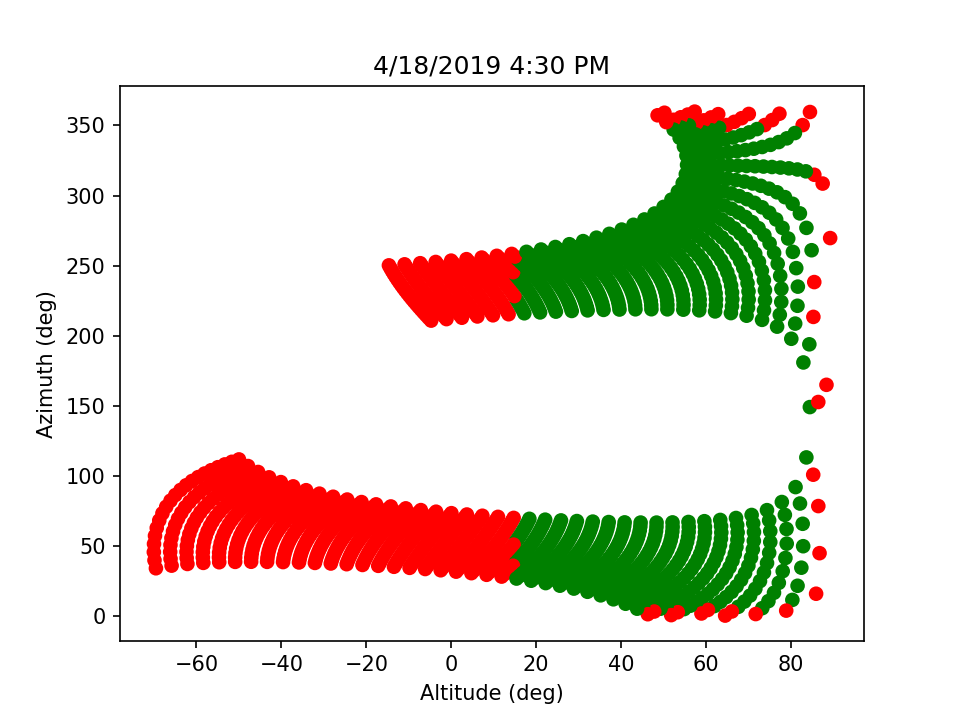

649 bad points + 737 good points = 1386 total points


In [107]:
%matplotlib notebook

col, ind_bad, ind_good = color(alt9, az9)
flalt9 = alt9.flatten()
flaz9 = az9.flatten()

plt.scatter(flalt9, flaz9, c=col)
plt.title('4/18/2019 4:30 PM')
plt.xlabel('Altitude (deg)')
plt.ylabel('Azimuth (deg)')

plt.savefig('430_Apr18.png', bbox_inches='tight')

plt.show()

print len(ind_bad[0]),'bad points +',len(ind_good[0]),'good points = 1386 total points'

In [100]:
#t = Time('2019-04-20T16:30:00', format='isot', scale='utc')
#dt = TimeDelta(3600, format='sec')
#times = t+dt*np.linspace(0,12,13)

In [23]:
six = Time('2019-04-17T18:00:00', format='isot', scale='utc')
alt6 = np.empty([21, 66])
az6 = np.empty([21, 66])
for i in range(len(alt6)):
    for j in range(len(alt6[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], six)
        alt6[i][j] = altaz[0]
        az6[i][j] = altaz[1]

<IPython.core.display.Javascript object>


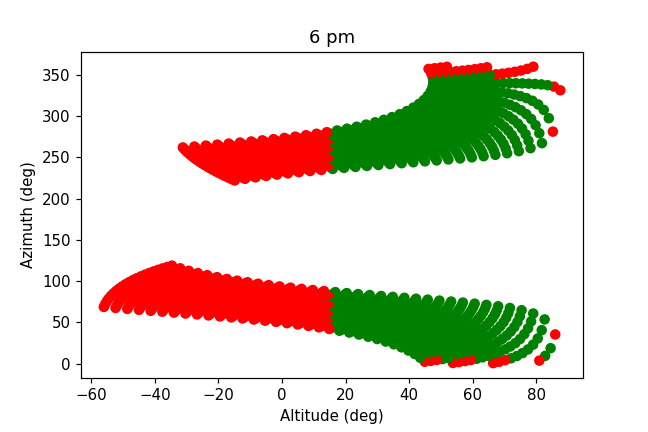

In [66]:
%matplotlib notebook

col, ind = color(alt6, az6)
flalt6 = alt6.flatten()
flaz6 = az6.flatten()

plt.scatter(flalt6, flaz6, c=col)
plt.title('6 pm')
plt.xlabel('Altitude (deg)')
plt.ylabel('Azimuth (deg)')

plt.show()

#print len(ind[0])

In [25]:
eight = Time('2019-04-17T20:00:00', format='isot', scale='utc')
alt8 = np.empty([21, 66])
az8 = np.empty([21, 66])
for i in range(len(alt8)):
    for j in range(len(alt8[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], eight)
        alt8[i][j] = altaz[0]
        az8[i][j] = altaz[1]

<IPython.core.display.Javascript object>


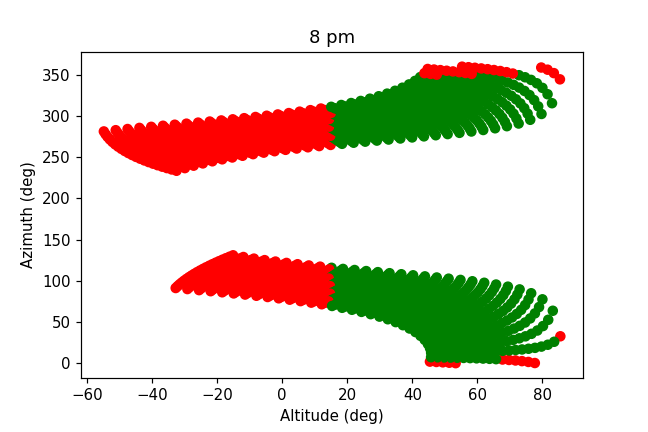

In [64]:
%matplotlib notebook

col, ind = color(alt8, az8)
flalt8 = alt8.flatten()
flaz8 = az8.flatten()

plt.scatter(flalt8, flaz8, c=col)
plt.title('8 pm')
plt.xlabel('Altitude (deg)')
plt.ylabel('Azimuth (deg)')
plt.show()

#print len(ind[0])

In [28]:
three = Time('2019-04-17T3:00:00', format='isot', scale='utc')
alt3 = np.empty([21, 66])
az3 = np.empty([21, 66])
for i in range(len(alt3)):
    for j in range(len(alt3[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], three)
        alt3[i][j] = altaz[0]
        az3[i][j] = altaz[1]

<IPython.core.display.Javascript object>


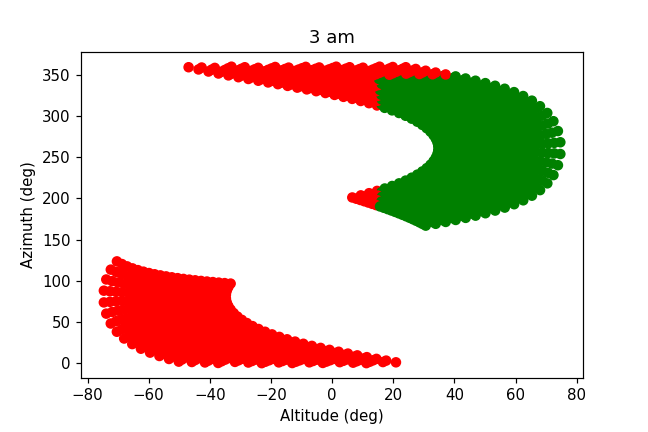

In [65]:
%matplotlib notebook

col, ind = color(alt3, az3)
flalt3 = alt3.flatten()
flaz3 = az3.flatten()

plt.scatter(flalt3, flaz3, c=col)
plt.title('3 am')
plt.xlabel('Altitude (deg)')
plt.ylabel('Azimuth (deg)')
plt.show()

#print len(ind[0])